In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf



from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


In [72]:
# Inlezen van CSV Data
# Dataset is Iris Flower Dataset
df = pd.read_csv('IRIS.csv')

# Deze dataset kan zowel een Classificatie of regressie probleem zijn, hangt af wat je wilt voorspellen.

# Ik wil species voorspellen, dus ik het als een Classificatie probleem

In [73]:
df

# Datakolommen

# sepal_length
# sepal_width
# petal_length
# petal_width
# species

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [74]:
# Zijn er ontbrekende waarden?
df.isnull().sum()
# Er zijn geen ontbrekende waarden

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Decision Tree Model

In [75]:
# Encodeer de target 'species' (bijv. Setosa → 0, Versicolor → 1, Virginica → 2)
le = LabelEncoder()
species_encoded = le.fit_transform(df['species'])



# Splitsen van features en target
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = species_encoded



In [76]:
# Splitsen van Train en Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree model trainen
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [77]:

#Voorspelling doen en evalueren
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

dt_accuracy = f"Nauwkeurigheid (accuracy) op testset:", accuracy_score(y_test, y_pred)

dt_accuracy



Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



('Nauwkeurigheid (accuracy) op testset:', 1.0)

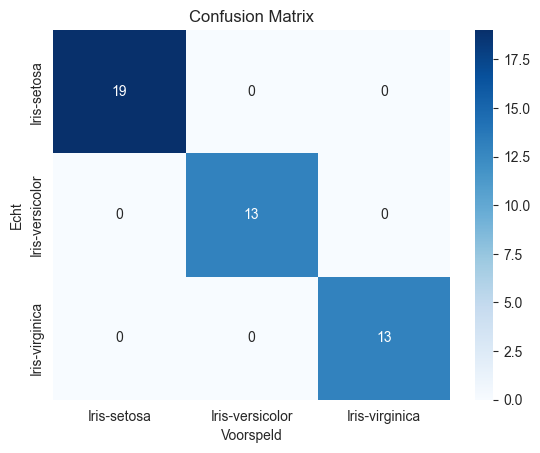

In [78]:
# Een confusion matrix plotten
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Voorspeld")
plt.ylabel("Echt")
plt.title("Confusion Matrix")
plt.show()

# Neural Network

In [79]:
#one-hot-coding gebruiken op species voor gebruik
df = pd.get_dummies(df, columns=['species'])


In [80]:
# selecteer features en target
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

target = df[['species_Iris-setosa', 'species_Iris-virginica', 'species_Iris-versicolor']]

# Normaliseer ze tussen 0 en 1
features = features / features.max()

X = features
y = target



In [81]:
# Train-test splitsen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

print(f"X_train shape: {X_train.shape}")
print(f"x_test shape: {X_test.shape}")


X_train shape: (105, 4)
x_test shape: (45, 4)


In [82]:
# TensorFlow Model maken

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(4, activation= "relu"))
model.add(tf.keras.layers.Dense(12, activation= "relu"))
model.add(tf.keras.layers.Dense(3, activation= "softmax"))


In [83]:
# model compilen
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(
    loss='categorical_crossentropy',
    optimizer= optimizer,
    metrics=['accuracy']
)


In [84]:
# model trainen met data
model.fit(X_train, y_train, epochs=100)


# Evalueren
loss, acc = model.evaluate(X_test, y_test)
nn_accuracy = f"Nauwkeurigheid (accuracy) op testset: {acc:.4f}"

nn_accuracy

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6004 - loss: 1.0310  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6400 - loss: 0.9660 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6712 - loss: 0.9085 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6337 - loss: 0.8773 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6181 - loss: 0.8545 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7364 - loss: 0.8129 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8738 - loss: 0.7755 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8359 - loss: 0.7466 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8879 - loss: 0.7188 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8942 - loss: 0.7065 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8949 - loss: 0.6553 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8849 - l

'Nauwkeurigheid (accuracy) op testset: 1.0000'

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


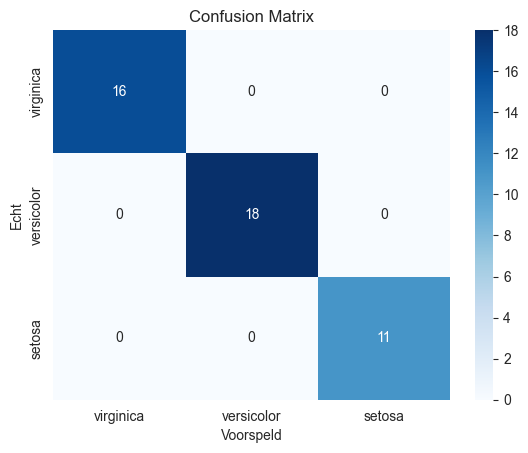

In [63]:

y_pred = model.predict(X_test)

# Zet y_pred (probabilities) om naar klasse-indexen
y_pred_classes = np.argmax(y_pred, axis=1)

# Zet y_test (one-hot) terug naar originele klasse-indexen
y_test_classes = np.argmax(y_test, axis=1)

# Confusion matrix plotten
cm = confusion_matrix(y_test_classes, y_pred_classes)
species = ['virginica', 'versicolor', 'setosa']
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=species, yticklabels=species)
plt.xlabel("Voorspeld")
plt.ylabel("Echt")
plt.title("Confusion Matrix")
plt.show()



# Vergelijken van modellen

## Decision Tree nauwkeurigheid is 100%

## Neural Network nauwkeurigheid is 100%

### Allebei modellen presteren evengoed, maar voor deze dataset presteert Decision Tree beter.
### Dit is omdat het maken van de Decision Tree en trainen op 100% veel sneller is, maar bij het maken van de Neural Network, heb ik de neuronen, hidden layers en learning rate meerdere keren moeten aanpassen tot dat ik de 100% nauwkeurigheid kreeg





# Reflectie op het process

#### Ik heb geleerd dat ik eerst datasets moet controleren voor dat ik ze gebruik, zodat ik geen foute dataset gebruik. Ik had dit gehad met mijn eerste dataset. Ik had uren mee gewerkt, maar kon mijn nauwkeurigheid niet boven 20% halen.

#### Dus ik zal volgende keer datasets uittesten of ze wel correct zijn voordat ik verder werkt.
#### De dataset waarmee ik nu werk is goed gemaakt en zijn data klopt, waardoor ik mijn modellen heb kunnen maken met een 100% nauwkeurigheid
